<a href="https://colab.research.google.com/github/JuliPolu/Deep_Learning_TensorFlow_Course/blob/main/GB_Neuro_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Двухслойная нейронная сеть на numpy

### Домашнее задание 1:

**Задание 1**. Попробуйте видоизменить параметры двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, эпох, слоев). <br>
Задание 2. Проведите анализ - что приводит к ухудшению нейронной сети? Что приводит к увеличению ее точности?

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/My Drive/Colab Notebooks/GB_NEURAL_NETWORK/"

In [ ]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
np.random.seed(1234)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [ ]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv(path+"Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


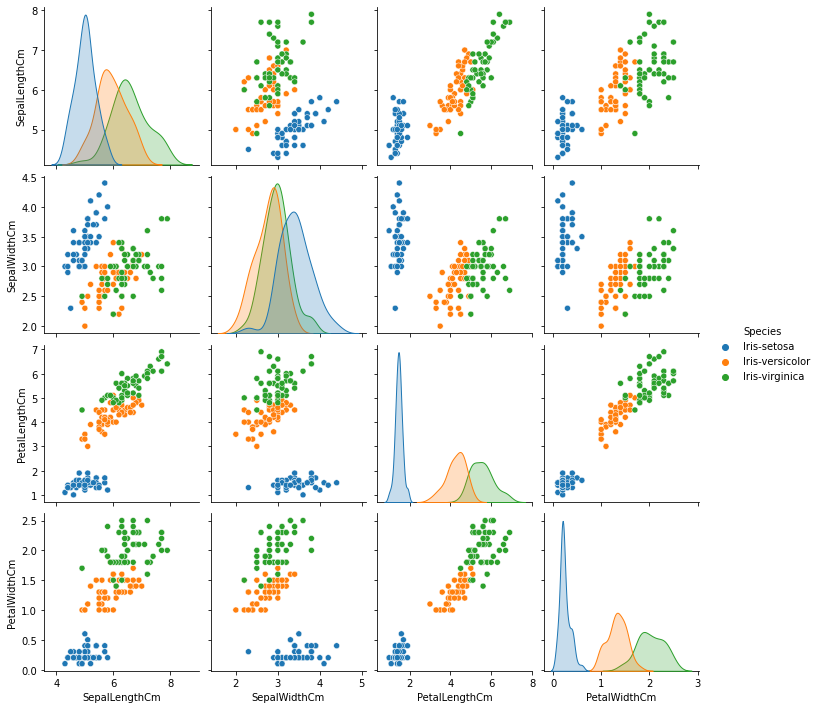

In [ ]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

In [ ]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

In [ ]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

In [ ]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
### Шаг 3. Обученние нейронной сети

# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
train_errors = []
test_errors = []

# процесс обучения
for i in range(50000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    train_errors.append(error)
    accuracy_train = (1 - error) * 100

    # ДОБАВИЛА ошибки на test
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = y_test - layer2_t

    error_t = np.mean(np.abs(layer2_error_t))
    test_errors.append(error_t)
    accuracy_test = (1 - error_t) * 100


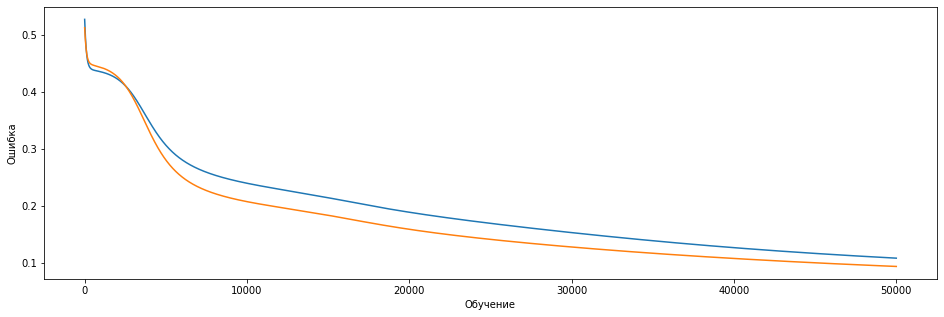

Точность нейронной сети 89.19% на трейне и 90.64% на тесте


In [ ]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(train_errors)
plt.plot(test_errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy_train,2)) + "% на трейне и " + str(round(accuracy_test,2)) + "% на тесте")

Попробуем изменить параметры нейронный сети
- Количество нейронов
- количество итераций
- скорость обучения

Для удобства решения задачи перепишем нейронную сетку подходом ООП

In [ ]:
class Neuro_1:
    # массив для ошибок, чтобы потом построить график
    errors = []
    # массив весов
    w = []
    # массив слоев
    layer = []
    accuracy = 0
    outs = None

    def __init__(self, neuron_numb=5, learning_rate=0.001, num_epochs=50000):
        self.set_params(neuron_numb=neuron_numb, learning_rate=learning_rate, num_epochs=num_epochs)

    def set_params(self, neuron_numb=5, learning_rate=0.001, num_epochs=50000):
        # neuron_numb определим число нейронов скрытого слоя
        self.neuron_numb = neuron_numb
        # скорость обучения (learning rate)
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.w = []
        self.errors = []
        self.layer = []
        self._generate_weights()

    def _generate_weights(self):
        self.w = []
        self.w.append(2 * np.random.random((4, self.neuron_numb)) - 1)  # для входного слоя   - 4 входа, 3 выхода
        self.w.append(2 * np.random.random((self.neuron_numb, 3)) - 1)  # для внутреннего слоя - 5 входов, 3 выхода

    def fit(self, X, y):
        layer0 = X

        # процесс обучения
        for i in range(self.num_epochs):
            # прямое распространение(feed forward)
            layer1 = self.sigmoid(np.dot(layer0, self.w[0]))
            layer2 = self.sigmoid(np.dot(layer1, self.w[1]))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y - layer2  # производная функции потерь = производная квадратичных потерь
            layer2_delta = layer2_error * self.sigmoid_deriv(layer2)

            layer1_error = layer2_delta.dot(self.w[1].T)
            layer1_delta = layer1_error * self.sigmoid_deriv(layer1)
            # коррекция
            self.w[1] += layer1.T.dot(layer2_delta) * self.learning_rate
            self.w[0] += layer0.T.dot(layer1_delta) * self.learning_rate
            # метрика модели
            error = np.mean(np.abs(layer2_error))
            self.errors.append(error)
            self.accuracy = (1 - error) * 100

        self.outs = layer2

    def predict(self, x):
        layer0_t = x
        layer1_t = self.sigmoid(np.dot(layer0_t, self.w[0]))
        layer2_t = self.sigmoid(np.dot(layer1_t, self.w[1]))
        return layer2_t

    # сигмоида и ее производная
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_deriv(x):
        return (x) * (1 - (x))

    @staticmethod
    def calculate_accuracy_percent(y_predict, y_test):
        layer2_error_t = y_test - y_predict
        # метрика модели
        error_t = np.mean(np.abs(layer2_error_t))
        accuracy_t = (1 - error_t) * 100
        return round(accuracy_t, 3)

In [ ]:
#Протестируем модель на дефолтных параметрах
neuro_default = Neuro_1()
neuro_default.fit(X_train, y_train)
preds = neuro_default.predict(X_test)
accuracy_test = neuro_default.calculate_accuracy_percent(preds, y_test)
print("Точность нейронной сети " + str(round(neuro_default.accuracy,2)) + "% на трейне и " + str(round(accuracy_test,2)) + "% на тесте")

Точность нейронной сети 91.45% на трейне и 91.94% на тесте


In [ ]:
neuro_default.w

[array([[-0.0709412 ,  0.19736071, -5.6617332 ,  4.33468547,  1.38573585],
        [-4.54914453,  2.63888354, -6.87828774,  3.8689661 ,  3.8453042 ],
        [ 6.09461992, -4.44668373,  7.76259614, -4.79736518, -7.20100667],
        [ 1.65700424, -0.33015768,  9.08036057, -7.37317808, -3.62779657]]),
 array([[ -4.82060644,   2.81487235,   3.99074321],
        [  1.99258321,  -1.66576004,  -4.62516252],
        [ -5.98082038,   7.54530537, -10.23240492],
        [  1.25451475,  -9.11195134,   4.0417697 ],
        [  3.49724125,  -6.58909234,  -6.29400198]])]

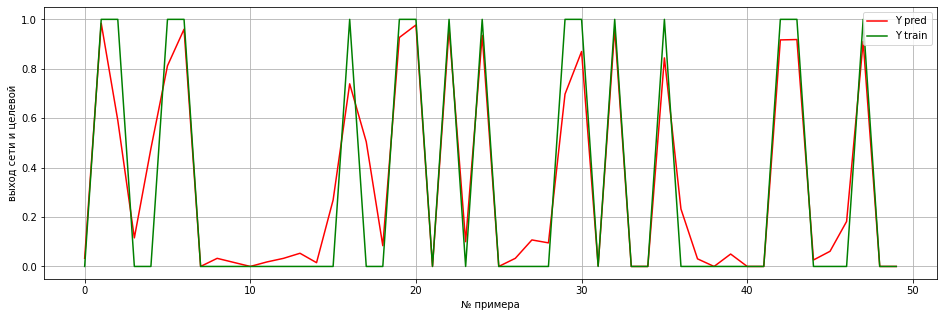

In [ ]:
layer2 = neuro_default.outs
N = 50
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, 1], 'r', label='Y pred')
plt.plot(y_train[:N, 1], 'g', label='Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.grid()
plt.show()  # расскоментируйте, чтобы посмотреть

Теперь будем подбирать оптимальные параметры нейронной сетки

In [ ]:
%time
neuro_df = pd.DataFrame()

grid_param = dict(neuron_numb=[1, 3, 5, 10, 20], learning_rate=[0.005, 0.01, 0.05, 0.1], num_epochs=[5000, 10000, 50000, 100000, 200000])
neuro_grid = Neuro_1()
for nnum in grid_param['neuron_numb']:
    for lrate in grid_param['learning_rate']:
        for nep in grid_param['num_epochs']:
            neuro_grid.set_params(neuron_numb=nnum, learning_rate=lrate, num_epochs=nep)
            neuro_grid.fit(X_train, y_train)
            preds = neuro_grid.predict(X_test)
            accuracy_test = neuro_grid.calculate_accuracy_percent(preds, y_test)
            print(f' Количество нейронов: {nnum:2}, Скорость обучения: {lrate:5}, Количество эпох: {nep}, Точность на трейне - {neuro_grid.accuracy}, Точность на тесте - {accuracy_test}')
            result = dict(neuron_numb=nnum, learning_rate=lrate, num_epochs=nep, accuracy_train=neuro_grid.accuracy, accuracy_test=accuracy_test)
            neuro_df = neuro_df.append(result, ignore_index = True)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
 Количество нейронов:  1, Скорость обучения: 0.005, Количество эпох: 5000, Точность на трейне - 59.21696511258479, Точность на тесте - 57.974
 Количество нейронов:  1, Скорость обучения: 0.005, Количество эпох: 10000, Точность на трейне - 60.732002245381324, Точность на тесте - 60.168
 Количество нейронов:  1, Скорость обучения: 0.005, Количество эпох: 50000, Точность на трейне - 64.2051343397722, Точность на тесте - 64.347
 Количество нейронов:  1, Скорость обучения: 0.005, Количество эпох: 100000, Точность на трейне - 65.09751455702441, Точность на тесте - 65.013
 Количество нейронов:  1, Скорость обучения: 0.005, Количество эпох: 200000, Точность на трейне - 65.83555228994345, Точность на тесте - 65.321
 Количество нейронов:  1, Скорость обучения:  0.01, Количество эпох: 5000, Точность на трейне - 61.035555663802384, Точность на тесте - 60.664
 Количество нейронов:  1, Скорость обучения:  0.01, Количество эпох: 10000, Т

In [ ]:
neuro_df.shape

(100, 5)

In [ ]:
neuro_df[neuro_df['accuracy_test'] == neuro_df['accuracy_test'].max()]

,neuron_numb,learning_rate,num_epochs,accuracy_train,accuracy_test
99,20.0,0.1,200000.0,99.217974,95.889


Максимальная точность достигается при максимальном количестве нейронов, высокой скорости обучения и максимальном количестве эпох, все 3 параметра положительно влияют на результаты обучения

In [ ]:
neuron_numb_analysis = neuro_df[(neuro_df['learning_rate'] == 0.01) & (neuro_df['num_epochs'] == 50000)]

Text(0.5, 1.0, 'Качество моделей на train и тест для двухслойной сети')

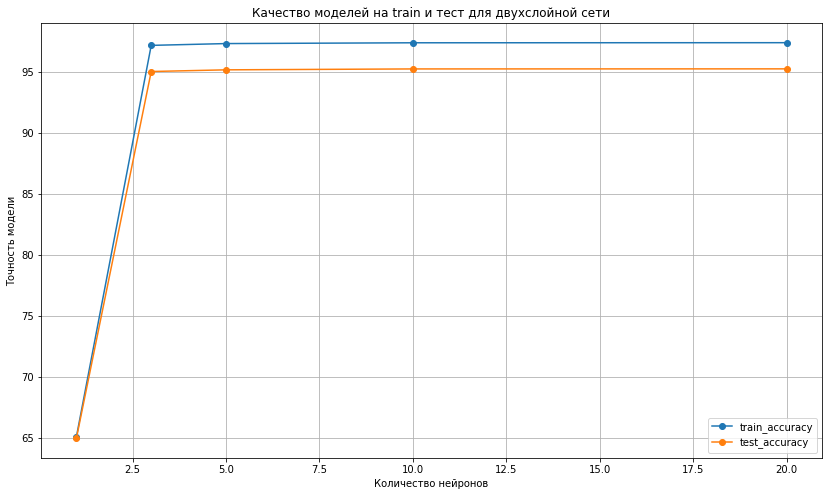

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(neuron_numb_analysis['neuron_numb'], neuron_numb_analysis['accuracy_train'], marker='o', label='train_accuracy')
plt.plot(neuron_numb_analysis['neuron_numb'], neuron_numb_analysis['accuracy_test'], marker='o', label='test_accuracy')
plt.legend(loc='best')
plt.ylabel('Точность модели')
plt.xlabel('Количество нейронов')
plt.grid()
plt.title('Качество моделей на train и тест для двухслойной сети')

Text(0.5, 1.0, 'Качество моделей на train и тест для двухслойной сети')

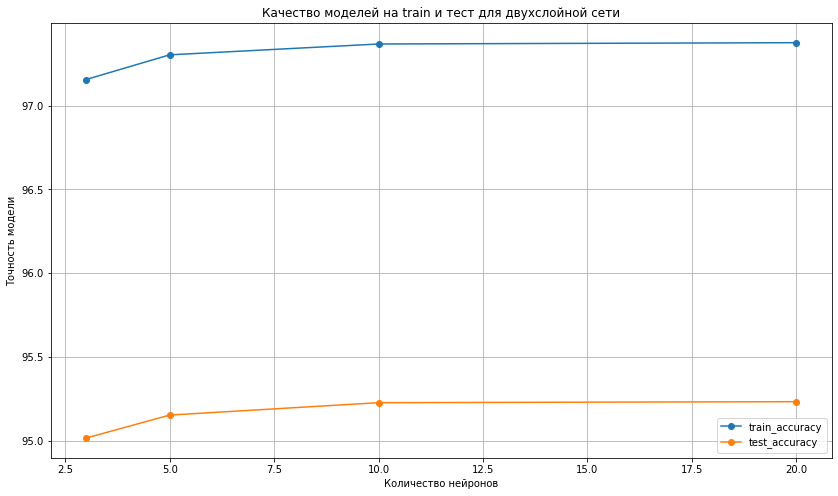

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(neuron_numb_analysis['neuron_numb'][1:], neuron_numb_analysis['accuracy_train'][1:], marker='o', label='train_accuracy')
plt.plot(neuron_numb_analysis['neuron_numb'][1:], neuron_numb_analysis['accuracy_test'][1:], marker='o', label='test_accuracy')
plt.legend(loc='best')
plt.ylabel('Точность модели')
plt.xlabel('Количество нейронов')
plt.grid()
plt.title('Качество моделей на train и тест для двухслойной сети')

Наибольший прирост точности модели при увеличении количества нейронов с одного до 2-х. После 10 нейронов прирост становится незначительным

In [ ]:
learning_rate_analysis = neuro_df[(neuro_df['neuron_numb'] == 10) & (neuro_df['num_epochs'] == 50000)]

Text(0.5, 1.0, 'Качество моделей на train и тест для двухслойной сети')

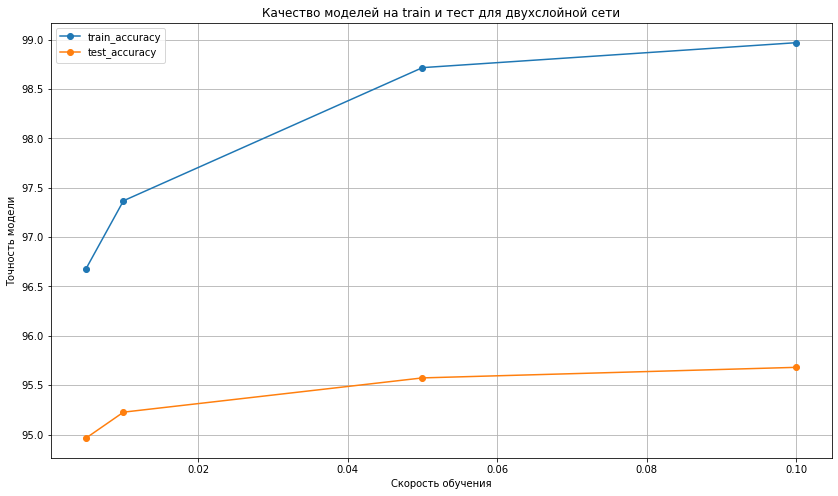

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(learning_rate_analysis['learning_rate'], learning_rate_analysis['accuracy_train'], marker='o', label='train_accuracy')
plt.plot(learning_rate_analysis['learning_rate'], learning_rate_analysis['accuracy_test'], marker='o', label='test_accuracy')
plt.legend(loc='best')
plt.ylabel('Точность модели')
plt.xlabel('Скорость обучения')
plt.grid()
plt.title('Качество моделей на train и тест для двухслойной сети')

Чем выше скорость обучения, тем лучше результат, однако после 0,05 прирост становится незначительным

In [ ]:
epoch_analysis = neuro_df[(neuro_df['neuron_numb'] == 10) & (neuro_df['learning_rate'] == 0.05)]
epoch_analysis

,neuron_numb,learning_rate,num_epochs,accuracy_train,accuracy_test
70,10.0,0.05,5000.0,96.687424,94.942
71,10.0,0.05,10000.0,97.390369,95.263
72,10.0,0.05,50000.0,98.716433,95.574
73,10.0,0.05,100000.0,98.986854,95.697
74,10.0,0.05,200000.0,99.115182,95.785


Text(0.5, 1.0, 'Качество моделей на train и тест для двухслойной сети')

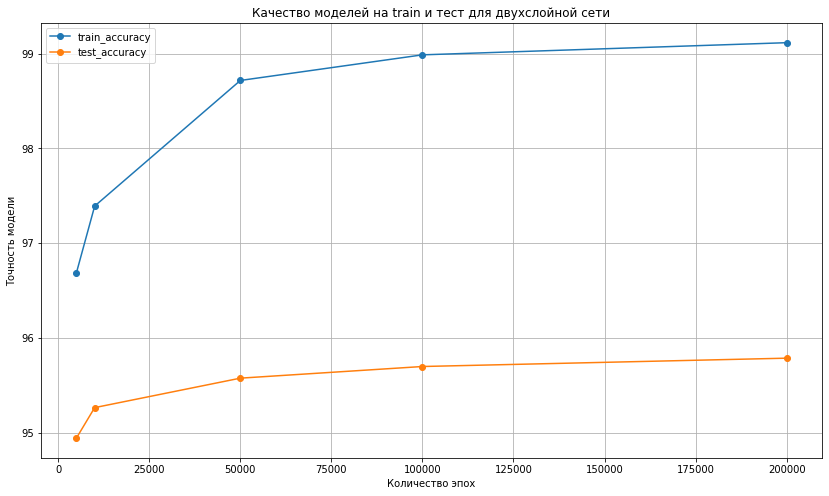

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(epoch_analysis['num_epochs'], epoch_analysis['accuracy_train'], marker='o', label='train_accuracy')
plt.plot(epoch_analysis['num_epochs'], epoch_analysis['accuracy_test'], marker='o', label='test_accuracy')
plt.legend(loc='best')
plt.ylabel('Точность модели')
plt.xlabel('Количество эпох')
plt.grid()
plt.title('Качество моделей на train и тест для двухслойной сети')

Увеличение количества эпох увеличивается точность нейронной сети, однако после 100000 эпох прирост значительно снижается

Переобучим модель на максимальных параметрах

In [ ]:
neuro_grid.set_params(neuron_numb=20, learning_rate=0.1, num_epochs=200000)
neuro_grid.fit(X_train, y_train)
y_pred = neuro_grid.predict(X_test)
accuracy = neuro_grid.calculate_accuracy_percent(y_pred, y_test)
print("Аккуратность нейронной сети на трейне " + str(neuro_grid.accuracy) + "%")
print("Аккуратность нейронной сети на тесте " + str(accuracy) + "%")

Аккуратность нейронной сети на трейне 99.22061122198468%
Аккуратность нейронной сети на тесте 95.887%


Попробуем построить модель с тремя слоями с оптимальными параметрами предыдущей сети (2-hidden)

In [ ]:
# определим число нейронов скрытого слоя
neuron_numb = 10

# присваевание случайных весов

w0 = 2 * np.random.random((4, neuron_numb)) - 1  # для входного слоя   - 4 входа, n выходов
w1 = 2 * np.random.random((neuron_numb, neuron_numb)) - 1  # для внутреннего слоя n x n
w2 = 2 * np.random.random((neuron_numb, 3)) - 1  # для внутреннего слоя - n входов, 3 выхода

# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
errors = []

layer0 = X_train

# процесс обучения
for i in range(100000):
    # прямое распространение(feed forward)
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3  # производная функции потерь = производная квадратичных потерь
    layer3_delta = layer3_error * sigmoid_deriv(layer3)

    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    # коррекция
    w2 += layer1.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100

print("Аккуратность нейронной сети " + str(round(accuracy, 2)) + "%")

Аккуратность нейронной сети 98.32%


In [ ]:
neuro_grid.set_params(neuron_numb=10, learning_rate=0.05, num_epochs=100000)
neuro_grid.fit(X_train, y_train)
y_pred = neuro_grid.predict(X_test)
accuracy = neuro_grid.calculate_accuracy_percent(y_pred, y_test)
print("Аккуратность нейронной сети на трейне " + str(neuro_grid.accuracy) + "%")
print("Аккуратность нейронной сети на тесте " + str(accuracy) + "%")

Аккуратность нейронной сети на трейне 98.99076917580983%
Аккуратность нейронной сети на тесте 95.704%


**Выводы**
* Модель с 2-мя слоями переведена в ОО-стиль для простоты работы. Определены
методы fit и predict
* Проведен поиск оптимального решения по сетке Рекордный результат при максимальных значениях всех параметров: Количество нейронов: 20, Скорость обучения: 0.1, Количество эпох: 200000, Точность на трейне - 92.22%, на тесте - 95.88%
* Увеличение всех параметров приводит к увеличению accuracy
* Построена модель с 3-слоями, однако без подбора параметров модель не показала более высокие результаты